## Document Classification by K-Means

### Includes

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mpl_toolkits import mplot3d

### Vectorizer
Using GloVe word vectors

In [2]:
class GloveVectorizer:
  def __init__(self):
    # load in pre-trained word vectors
    print('Loading word vectors...')
    word2vec = {}
    embedding = []
    idx2word = []
    with open('glove.6B.50d.txt',encoding='utf-8', errors='ignore') as f:
      # is just a space-separated text file in the format:
      # word vec[0] vec[1] vec[2] ...
      for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)
    print('Found %s word vectors.' % len(word2vec))

    # save for later
    self.word2vec = word2vec
    self.embedding = np.array(embedding)
    self.word2idx = {v:k for k,v in enumerate(idx2word)}
    self.V, self.D = self.embedding.shape

  def fit(self, data):
    pass

  def transform(self, data):
    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.lower().split()
      vecs = []
      for word in tokens:
        if word in self.word2vec:
          vec = self.word2vec[word]
          vecs.append(vec)
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X

  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [3]:
def main():
    train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
    test = pd.read_csv('r8-test-all-terms.txt', header=None, sep='\t')
    train.columns = ['label', 'content']
    test.columns = ['label', 'content']

    vectorizer = GloveVectorizer()
    Xtrain = vectorizer.fit_transform(train.content)
    Ytrain = train.label

    Xtest = vectorizer.transform(test.content)
    Ytest = test.label

    # create the model, train it, print scores
    model = RandomForestClassifier(n_estimators=200)
    model.fit(Xtrain, Ytrain)
    print("train score:", model.score(Xtrain, Ytrain))
    print("test score:", model.score(Xtest, Ytest))

if __name__ == "__main__":
    main()

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 5485
Numer of samples with no words found: 0 / 2189
train score: 0.9992707383773929
test score: 0.9342165372316126


# ----------------------------------------------------------------------------------------------------------

In [4]:

#-------------------------------------------------------------------------------#
    
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('r8-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']
train['lenght'] = train['content'].str.len()
train['lenght_norm'] = (train['lenght'] - train['lenght'].min())/(train['lenght'].max()-train['lenght'].min())

#-------------------------------------------------------------------------------#

#print(train.head())
vectorizer = GloveVectorizer()

Xtrain = vectorizer.fit_transform(train.content)
model_1=KMeans(n_clusters=8, init='random').fit(Xtrain)

centroids = model_1.cluster_centers_
#print(centroids)

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 5485


# K Means Graph- 2 Features (Normalized)

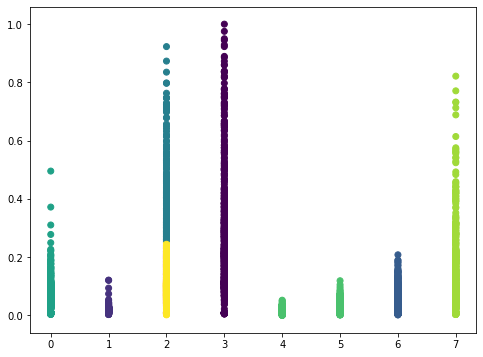

In [5]:
zipped_data = np.array(list(zip(model_1.labels_, train.lenght_norm)))

model_2=KMeans(n_clusters=8, init='random').fit(zipped_data)

plt.figure(figsize=(8, 6))
plt.scatter(zipped_data[:,0], zipped_data[:,1], c=model_2.labels_.astype(float))
plt.show()

# K Means Graph- 2 Features (Non Normalized)

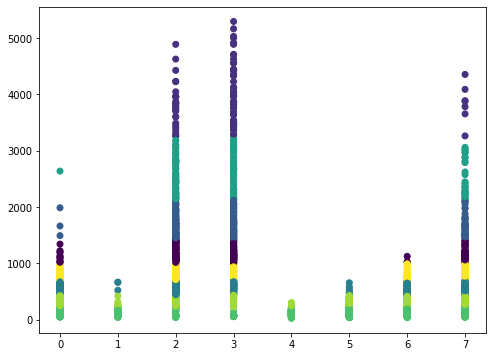

In [6]:
zipped_data = np.array(list(zip(model_1.labels_, train.lenght)))

model_3=KMeans(n_clusters=8, init='random').fit(zipped_data)
# K Means Graph- 2 Features (Not normalized)
plt.figure(figsize=(8, 6))
plt.scatter(zipped_data[:,0], zipped_data[:,1], c=model_3.labels_.astype(float))
plt.show()

# Elbow Test

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 5485


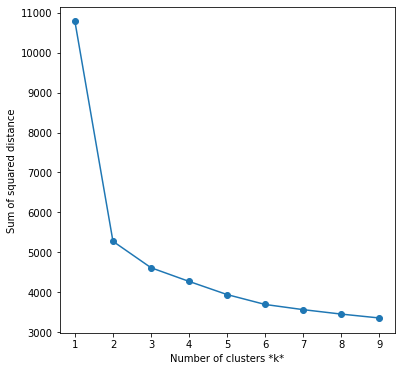

In [7]:
sse = []
list_k = list(range(1, 10))
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(Xtrain)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# New Features for K Mean

In [8]:
# Defining train again
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('r8-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']
train['lenght'] = train['content'].str.len()
train['lenght_norm'] = (train['lenght'] - train['lenght'].min())/(train['lenght'].max()-train['lenght'].min())
lenght_mn=train['lenght'].mean()

    

In [9]:
#New features as new columns
train['lenght_mean']=(lambda x: train['lenght']/lenght_mn)(train['lenght'].values)
train['words_num'] = train['content'].str.split().str.len()
train['words_len_med'] = train['content'].str.len()/train['words_num']

In [10]:
train.head()

,label,content,lenght,lenght_norm,lenght_mean,words_num,words_len_med
0,earn,champion products ch approves stock split cham...,361,0.062868,0.596235,62,5.822581
1,acq,computer terminal systems cpml completes sale ...,1246,0.230959,2.057919,210,5.933333
2,earn,cobanco inc cbco year net shr cts vs dlrs net ...,221,0.036277,0.365008,44,5.022727
3,earn,am international inc am nd qtr jan oper shr lo...,465,0.082621,0.768003,93,5.000000
4,earn,brown forman inc bfd th qtr net shr one dlr vs...,151,0.022982,0.249395,35,4.314286


# Normalizing all remaining Data

In [11]:
train['words_num_norm'] = (train['words_num'] - train['words_num'].min())/(train['words_num'].max()-train['words_num'].min())
train['words_len_med_norm'] = (train['words_len_med'] - train['words_len_med'].min())/(train['words_len_med'].max()-train['words_len_med'].min())

# Testing Dataset's Novel Features with K Means

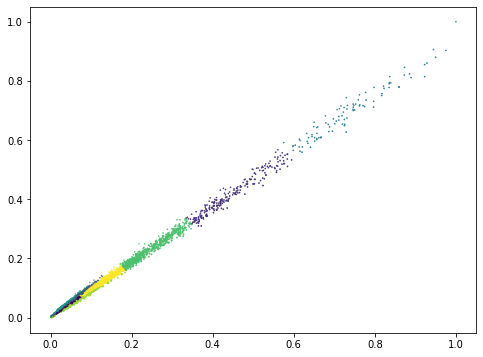

In [12]:
zipped_data = np.array(list(zip(train.lenght_norm,train.words_num_norm, train.words_len_med_norm)))

model_4_fit=KMeans(n_clusters=8, init='random').fit(zipped_data)


plt.figure(figsize=(8, 6))
plt.scatter(zipped_data[:,0],zipped_data[:,1], zipped_data[:,2], c=model_4_fit.labels_.astype(float))
plt.show()

# 3D Plotting

Text(0.5, 0.92, 'K-Means Normalized')

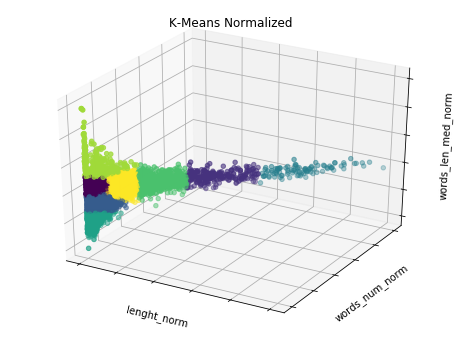

In [13]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(zipped_data[:,0],zipped_data[:,1], zipped_data[:,2], c=model_4_fit.labels_.astype(float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('lenght_norm')
ax.set_ylabel('words_num_norm')
ax.set_zlabel('words_len_med_norm')
ax.set_title('K-Means Normalized')

# Elbow Test for the "3 features model"

Numer of samples with no words found: 0 / 5485


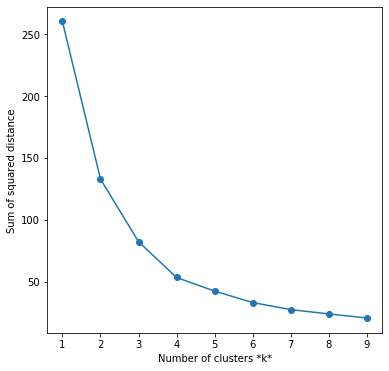

In [14]:
sse = []
list_k = list(range(1, 10))


# Defining train again
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
train['lenght'] = train['content'].str.len()
train['lenght_norm'] = (train['lenght'] - train['lenght'].min())/(train['lenght'].max()-train['lenght'].min())
lenght_mn=train['lenght'].mean()
#New features as new columns
train['lenght_mean']=(lambda x: train['lenght']/lenght_mn)(train['lenght'].values)
train['words_num'] = train['content'].str.split().str.len()
train['words_len_med'] = train['content'].str.len()/train['words_num']
train['words_num_norm'] = (train['words_num'] - train['words_num'].min())/(train['words_num'].max()-train['words_num'].min())
train['words_len_med_norm'] = (train['words_len_med'] - train['words_len_med'].min())/(train['words_len_med'].max()-train['words_len_med'].min())
zipped_data = np.array(list(zip(train.lenght_norm,train.words_num_norm, train.words_len_med_norm)))


Xtrain = vectorizer.fit_transform(train.content)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(zipped_data)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 5485


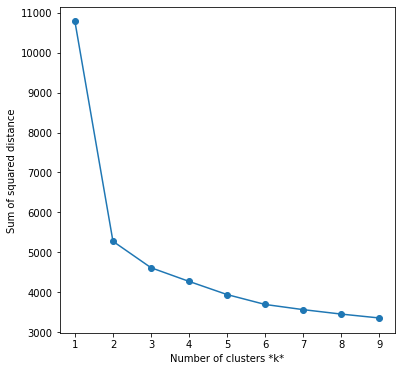

In [15]:
sse = []
list_k = list(range(1, 10))
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(Xtrain)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');